# **Street View Housing Number Digit Recognition**
## Problem Statement

Our goal is to train a neural network to identify images of digits. We will use the SVHN dataset, which contains over 600,000 labeled digits cropped from street-level photos. 



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

## **Preparing the dataset**



In [ ]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

# Data Exploration

In [ ]:
# checking the size of the training and test data sets
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

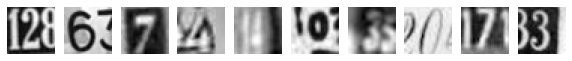

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
# Shape and the array of pixels for the first image
print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)


254.9745

In [ ]:
# Normalizing inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 250.0

In [ ]:
# One-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**


In [ ]:
model1 = Sequential() 
model1.add(Dense(64, activation='relu', input_shape=(1024,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Printing the summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model
history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=128, verbose=1)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2968 - accuracy: 0.1121 - val_loss: 2.2641 - val_accuracy: 0.1365
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1260 - accuracy: 0.2057 - val_loss: 1.9909 - val_accuracy: 0.2689
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8549 - accuracy: 0.3374 - val_loss: 1.6914 - val_accuracy: 0.4063
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6149 - accuracy: 0.4441 - val_loss: 1.5213 - val_accuracy: 0.5030
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4541 - accuracy: 0.5207 - val_loss: 1.3888 - val_accuracy: 0.5550
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3445 - accuracy: 0.5648 - val_loss: 1.3216 - val_accuracy: 0.5842
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.2758 - accuracy: 0.5928 - val_loss: 1.2601 - val_accuracy: 0.6032
Epoch 

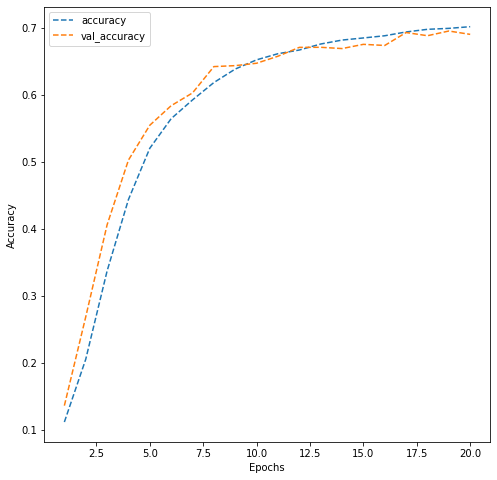

In [ ]:
# Plotting the accuracies
dict_hist = history_model_1.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations: **
* the accuracy on both the training and validaiton sets  are capping out around 0.7, meaning the model is underfitting the dataset
* the accuracy seemed to have been nearing a plateu, so additional epochs may have only resulted in minor improvements to the model

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

### **Question 4: Build and train the new ANN model as per the above mentioned architecture (10 Marks)**

In [4]:
model2 = Sequential()  
model2.add(Dense(256, activation='relu', input_shape=(1024,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

In [5]:
# Printing the model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
history_model_2 = model_2.fit(X_train,
                              y_train,
                              validation_split=0.2,
                              batch_size=128,
                              verbose=1,
                              epochs=30)

Epoch 1/30
263/263 [==============================] - 6s 11ms/step - loss: 2.3450 - accuracy: 0.1085 - val_loss: 2.2767 - val_accuracy: 0.1340
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 2.0342 - accuracy: 0.2575 - val_loss: 1.8202 - val_accuracy: 0.3630
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 1.6066 - accuracy: 0.4447 - val_loss: 1.5031 - val_accuracy: 0.4754
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4067 - accuracy: 0.5235 - val_loss: 1.2604 - val_accuracy: 0.5808
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 1.2575 - accuracy: 0.5862 - val_loss: 1.1399 - val_accuracy: 0.6344
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 1.1867 - accuracy: 0.6154 - val_loss: 1.0533 - val_accuracy: 0.6650
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 1.1050 - accuracy: 0.6460 - val_loss: 1.0352 - val_accuracy: 0.6686
Epoc

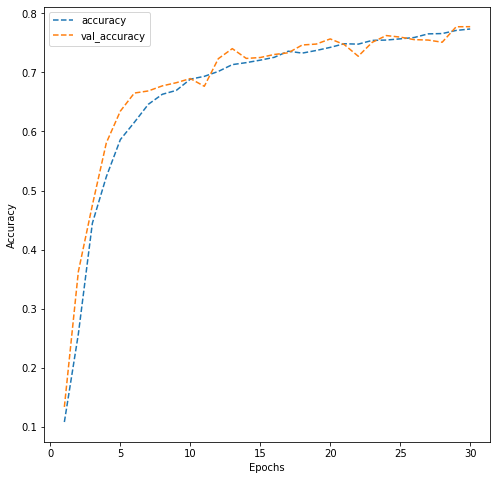

In [ ]:
# Plotting the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1, 31)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
* the accuracy of the model has improved somewhat
* with the accuracy peaking around 0.77, the model is still underfitting the data 
* we can see the accuracy of the validation set fluctuating more than it did in the previous model, meaning the loss function is circiling some local minimum. This possibly suggests that added epochs would be unlikely to improve model performance

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1814
           1       0.77      0.82      0.79      1828
           2       0.81      0.79      0.80      1803
           3       0.73      0.75      0.74      1719
           4       0.76      0.86      0.81      1812
           5       0.75      0.73      0.74      1768
           6       0.81      0.72      0.76      1832
           7       0.86      0.77      0.82      1808
           8       0.71      0.75      0.73      1812
           9       0.73      0.78      0.75      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



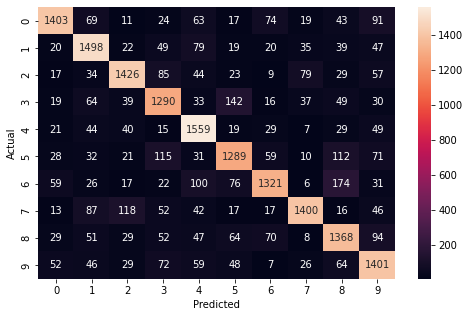

In [ ]:
# printing a classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:**
* the model is about 78% accurate. The precision and recall of the model for each digit is also around 78%.
* while the model is correct most of the time, it seems to get confused between specific pairs of digits most often. For example, the model makes the most mistakes confusing 3's as 5's, or 6's as 8's.
* the model seems to make the fewest mistakes with the number 7.